# Make TauP models and view TauP results 

## Section 1 - Import code
## Section 2 - Build some models for TauP
## Section 3 - View the velocity models and velocity perturbations - for the paper
## Section 4 - TauP example phases
## Section 5 - View the depth of direct P at 2.17, and 28.05 and 57.67

In [1]:
import matplotlib.pyplot as plt
    
from obspy.taup.taup_create import build_taup_model
from obspy.taup import TauPyModel
from obspy.taup.tau import plot_ray_paths, plot_travel_times
import pandas as pd
import numpy as np
from matplotlib import gridspec
import os

plt.rcParams['figure.figsize'] = [12, 7]

MOON_RADIUS_IN_KM = 1737.
MOON_FLATTENING = 1/825

EARTH_RADIUS_IN_KM=6378.1370
EARTH_FLATTENING=0.0033528106647474805

# %matplotlib notebook
# %matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Section 2 - Build some models for TauP

In [2]:
# Code Block 1

# build some models
# the models are loaded into the python environment:
# miniconda3/envs/postprocessing/lib/python3.8/site-packages/obspy/taup/data/

build_taup_model(
  filename='input_files/vel_models/ISSI_MOON_M1_atten_taup.nd')

build_taup_model(
  filename='input_files/vel_models/VPREMOON_atten_taup.nd')

build_taup_model(
  filename='input_files/vel_models/VPREMOON_atten_no_LVZ_taup.nd')

print('finished building .npz files')

Building obspy.taup model for 'input_files/vel_models/ISSI_MOON_M1_atten_taup.nd' ...
filename = input_files/vel_models/ISSI_MOON_M1_atten_taup.nd
Done reading velocity model.
Radius of model . is 1737.1
Using parameters provided in TauP_config.ini (or defaults if not) to call SlownessModel...
Parameters are:
taup.create.min_delta_p = 0.1 sec / radian
taup.create.max_delta_p = 11.0 sec / radian
taup.create.max_depth_interval = 115.0 kilometers
taup.create.max_range_interval = 0.04363323129985824 degrees
taup.create.max_interp_error = 0.05 seconds
taup.create.allow_inner_core_s = True
Slow model  643 P layers,747 S layers
Done calculating Tau branches.
Done Saving /opt/miniconda3/envs/postprocessingX/lib/python3.8/site-packages/obspy/taup/data/ISSI_MOON_M1_atten_taup.npz
Method run is done, but not necessarily successful.
Building obspy.taup model for 'input_files/vel_models/VPREMOON_atten_taup.nd' ...
filename = input_files/vel_models/VPREMOON_atten_taup.nd
Done reading velocity model.

## Section 3 - View the velocity models and velocity perturbations - for the paper

./output_figures/velocity_attenuation.png


/var/folders/v0/h_t_rfv902zdkcl93934tzkm0000gq/T/ipykernel_43619/1512674639.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_model = pd.read_csv('input_files/vel_models/ISSI_MOON_M1_atten.bm',names=['depth','vp','vs','rho','qmu','qkappa'],sep=None,skiprows=10,skipinitialspace=1)
/var/folders/v0/h_t_rfv902zdkcl93934tzkm0000gq/T/ipykernel_43619/1512674639.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_model = pd.read_csv('input_files/vel_models/VPREMOON_atten.bm',names=['depth','vp','vs','density', 'qmu', 'qkappa','blank'],sep=None,skiprows=11,skipinitialspace=2,comment='#')
/var/folders/v0/h_t_rfv902zdkcl93934tzkm0000gq/T/ipykernel_43619/1512674639.py:26: ParserWarning: Falling back to the '

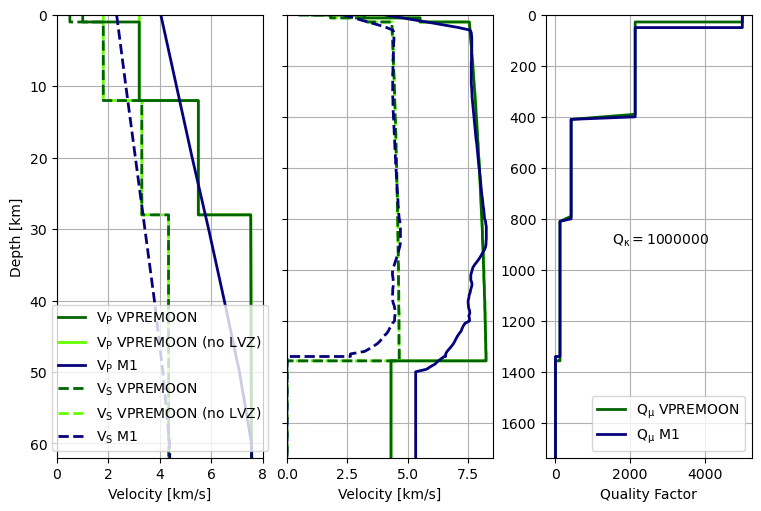

In [3]:
# Plot velocity_attenuation.png

def plot_models():

    #issi moon model
    df_model = pd.read_csv('input_files/vel_models/ISSI_MOON_M1_atten.bm',names=['depth','vp','vs','rho','qmu','qkappa'],sep=None,skiprows=10,skipinitialspace=1)
  
    ISSI_M1_depth = df_model.depth.astype(float).to_list()
    ISSI_M1_vp = df_model.vp.astype(float).to_list()
    ISSI_M1_vs = df_model.vs.astype(float).to_list()
    ISSI_M1_qmu = df_model.qmu.astype(float).to_list()
    ISSI_M1_qkappa = df_model.qkappa.astype(float).to_list()
    
    # VPREMOON     
    df_model = pd.read_csv('input_files/vel_models/VPREMOON_atten.bm',names=['depth','vp','vs','density', 'qmu', 'qkappa','blank'],sep=None,skiprows=11,skipinitialspace=2,comment='#')
    
#     radius = df_model.radius.astype(float).to_list()
#     vprem_depth = [(1737.4 - i) for i in radius]
    vprem_depth = df_model.depth.astype(float).to_list()
    vprem_vs = df_model.vs.astype(float).to_list()
    vprem_vp = df_model.vp.astype(float).to_list()
    vprem_qmu = df_model.qmu.astype(float).to_list()
    vprem_qkappa = df_model.qkappa.astype(float).to_list()
    
    # VPREMOON     - no low velocity zone
    df_model = pd.read_csv('input_files/vel_models/VPREMOON_atten_no_LVZ.bm',names=['depth','vp','vs','density', 'qmu', 'qkappa','blank'],sep=None,skiprows=12,skipinitialspace=2,comment='#')
    
#     radius = df_model.radius.astype(float).to_list()
#     vprem_depth = [(1737.4 - i) for i in radius]
    vprem_no_lvz_depth = df_model.depth.astype(float).to_list()
    vprem_no_lvz_vs = df_model.vs.astype(float).to_list()
    vprem_no_lvz_vp = df_model.vp.astype(float).to_list()
    
    fig = plt.figure(constrained_layout=True,figsize=(7.5, 5))
    gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
    
    colormatch1 = {
    'VPREMOON':'#006400',
    'VPREMOON_no_LVZ':'#66FF00',
    'M1': '#05007B',
    }

    ax1 = fig.add_subplot(gs[0, 0])
 

    plt.plot(vprem_vp,vprem_depth,color=colormatch1['VPREMOON'],alpha=1,linewidth=2,zorder=2,label='V$_\mathrm{P}$ VPREMOON')
    plt.plot(vprem_no_lvz_vp,vprem_no_lvz_depth,color=colormatch1['VPREMOON_no_LVZ'],alpha=1,linewidth=2,zorder=1,label='V$_\mathrm{P}$ VPREMOON (no LVZ)')
    plt.plot(ISSI_M1_vp,ISSI_M1_depth,color=colormatch1['M1'],alpha=1,linewidth=2,zorder=2,label='V$_\mathrm{P}$ M1')
  
    plt.plot(vprem_vs,vprem_depth,linestyle='dashed',color=colormatch1['VPREMOON'],alpha=1,linewidth=2,zorder=2,label='V$_\mathrm{S}$ VPREMOON')
    plt.plot(vprem_no_lvz_vs,vprem_no_lvz_depth,linestyle='dashed',color=colormatch1['VPREMOON_no_LVZ'],alpha=1,linewidth=2,zorder=1,label='V$_\mathrm{S}$ VPREMOON (no LVZ)')
    plt.plot(ISSI_M1_vs,ISSI_M1_depth,linestyle='dashed',color=colormatch1['M1'],alpha=1,linewidth=2,zorder=2,label='V$_\mathrm{S}$ M1')

    plt.xlabel('Velocity [km/s]')
    plt.ylabel('Depth [km]')
    plt.ylim(62,0)
    plt.xlim(0,8)
    plt.legend(loc='lower center')
    plt.grid()

    ax2 = fig.add_subplot(gs[0, 1])
    

    
    plt.plot(vprem_vp,vprem_depth,color=colormatch1['VPREMOON'],alpha=1,linewidth=2,zorder=2,label='V$_\mathrm{P}$ VPREMOON')
    plt.plot(vprem_no_lvz_vp,vprem_no_lvz_depth,color=colormatch1['VPREMOON_no_LVZ'],alpha=1,linewidth=2,zorder=1,label='V$_\mathrm{P}$ VPREMOON (no LVZ)')
    plt.plot(ISSI_M1_vp,ISSI_M1_depth,color=colormatch1['M1'],alpha=1,linewidth=2,zorder=2,label='V$_\mathrm{P}$ M1')
  
    plt.plot(vprem_vs,vprem_depth,linestyle='dashed',color=colormatch1['VPREMOON'],alpha=1,linewidth=2,zorder=2,label='V$_\mathrm{S}$ VPREMOON')
    plt.plot(vprem_no_lvz_vs,vprem_no_lvz_depth,linestyle='dashed',color=colormatch1['VPREMOON_no_LVZ'],alpha=1,linewidth=2,zorder=1,label='V$_\mathrm{S}$ VPREMOON (no LVZ)')
    plt.plot(ISSI_M1_vs,ISSI_M1_depth,linestyle='dashed',color=colormatch1['M1'],alpha=1,linewidth=2,zorder=2,label='V$_\mathrm{S}$ M1')

    plt.xlabel('Velocity [km/s]')
    plt.ylim(1737,0)
    plt.xlim(0,8.5)
    ax2.yaxis.set_ticklabels([])
    plt.grid()

    ax3 = fig.add_subplot(gs[0, 2])
    
    plt.plot(vprem_qmu,vprem_depth,color=colormatch1['VPREMOON'],alpha=1,linewidth=2,zorder=2,label='Q$_\mathrm{\mu}$ VPREMOON')
    plt.plot(ISSI_M1_qmu,ISSI_M1_depth,color=colormatch1['M1'],alpha=1,linewidth=2,zorder=2,label='Q$_\mathrm{\mu}$ M1')
  
    plt.xlabel('Quality Factor')
    plt.ylim(1737,0)
    plt.grid()
    plt.annotate(r'Q$_\mathrm{\kappa}=1000000$',xy=(1500,900)) 
    plt.legend()
    fig_name = os.path.join('./output_figures/','velocity_attenuation.png')
    print(fig_name)
    plt.savefig(fig_name)
    plt.show()
   
plot_models()    

### View the velocity range - for the paper 

/var/folders/v0/h_t_rfv902zdkcl93934tzkm0000gq/T/ipykernel_43619/92814281.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_model = pd.read_csv('input_files/vel_models//ISSI_MOON_M1_atten.bm',names=['depth','vp','vs','rho','qmu','qkappa'],sep=None,skiprows=10,skipinitialspace=1)


./output_figures/velocity_range.png


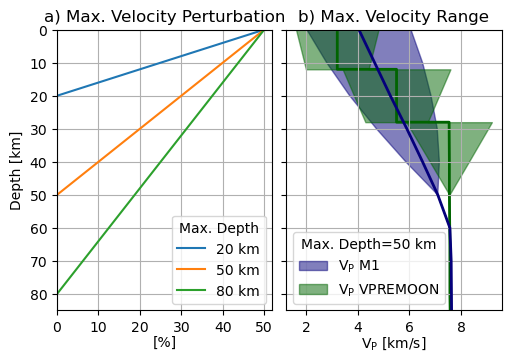

In [4]:
# Plot velocity_range.png

def plot_velocity_range():

    #issi moon model
    df_model = pd.read_csv('input_files/vel_models//ISSI_MOON_M1_atten.bm',names=['depth','vp','vs','rho','qmu','qkappa'],sep=None,skiprows=10,skipinitialspace=1)
  
    ISSI_M1_depth = df_model.depth.astype(float).to_list()
    ISSI_M1_vp = df_model.vp.astype(float).to_list()

    # The interpolation wasn't looking great on the figure, so I wrote out the values at 20, 50 and 90 km depth  
    vprem_depth = [0,   12, 12,   20,  28,  28,   40,   50,   65.4, 80,   90]
    vprem_vp =    [3.2, 3.2, 5.5, 5.5, 5.5, 7.54, 7.55, 7.55, 7.57, 7.57, 7.59 ]
    
    fig = plt.figure(constrained_layout=True,figsize=(5, 3.5))
    gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    
    colormatch1 = {
    'VPREMOON':'#006400',
    'VPREMOON_no_LVZ':'#66FF00',
    'M1': '#05007B',
    }
    
    M1_vp_max = []
    M1_vp_min = []
    for vp, depth in zip(ISSI_M1_vp,ISSI_M1_depth): 

        if depth <= 50:
            alpha =(-1*depth)+50
        else:
            alpha = 0 
            
        M1_vp_max.append(vp + vp*alpha/100)
        M1_vp_min.append(vp - vp*alpha/100)

    vprem_vp_max = []
    vprem_vp_min = []
    
    for vp, depth in zip(vprem_vp,vprem_depth): 

        #       2) REF1D: perturbation w.r.t. the 1D reference model
        #          X_3D = (1 + value_in_file) * X_1D
        # values in the file 
        
        
        if depth <= 50:
            alpha =(-1*depth)+50
        else:
            alpha = 0 
        
        vprem_vp_max.append(vp + vp*alpha/100)
        vprem_vp_min.append(vp - vp*alpha/100)
        
    ax0 = fig.add_subplot(gs[0, 0])

    plt.plot([50,0],[0,20],label='20 km')
    
    
    #       2) REF1D: perturbation w.r.t. the 1D reference model
    #          X_3D = (1 + value_in_file) * X_1D
    linear = [(-1*x)+50 for x in range(51)]
    depths = list(range(51))
    plt.plot(linear,depths,label='50 km')
    plt.plot([50,0],[0,80],label='80 km')

    xticks = np.arange(0, 60, 10)
    ax0.set_xticks(xticks)
    
#     ax0.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    plt.title('a) Max. Velocity Perturbation')
    plt.ylabel('Depth [km]')
    plt.xlabel('[%]',labelpad=1)
    plt.xlim(0,52)
    plt.ylim(85,0) 
    plt.legend(loc='lower right',title="Max. Depth")

    plt.grid()


    ax1 = fig.add_subplot(gs[0, 1])
 
    plt.plot(ISSI_M1_vp,ISSI_M1_depth,color=colormatch1['M1'],alpha=1,linewidth=2,zorder=2)
    plt.fill_betweenx(y=ISSI_M1_depth,x1=M1_vp_min,x2=M1_vp_max,color=colormatch1['M1'],zorder=1,alpha=0.5,label='V$_\mathrm{P}$ M1')
    
    plt.plot(vprem_vp,vprem_depth,color=colormatch1['VPREMOON'],alpha=1,linewidth=2,zorder=1)
    plt.fill_betweenx(y=vprem_depth,x1=vprem_vp_min,x2=vprem_vp_max,color=colormatch1['VPREMOON'],zorder=1,alpha=0.5,label='V$_\mathrm{P}$ VPREMOON')
    
    
#     plt.plot(alpha,ISSI_M1_depth)
    

#     plt.title('Maximum range of V$_\mathrm{P}$ [km/s]')
    plt.title('b) Max. Velocity Range')
#     plt.ylabel('Depth [km]')
    plt.xlabel('V$_\mathrm{P}$ [km/s]',labelpad=0)
#     plt.ylim(85,0)
#     plt.xlim(0,9)
    
#     plt.ylim(65,25)
#     plt.xlim(6,8)
    plt.ylim(85,0)
    plt.legend(loc='lower left',title="Max. Depth=50 km")
#     ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    plt.grid()
    ax1.set_yticklabels([])
    fig_name = os.path.join('./output_figures/','velocity_range.png')
    print(fig_name)
    plt.savefig(fig_name)
    plt.show()

plot_velocity_range()    

## Section 4 - TauP example phases

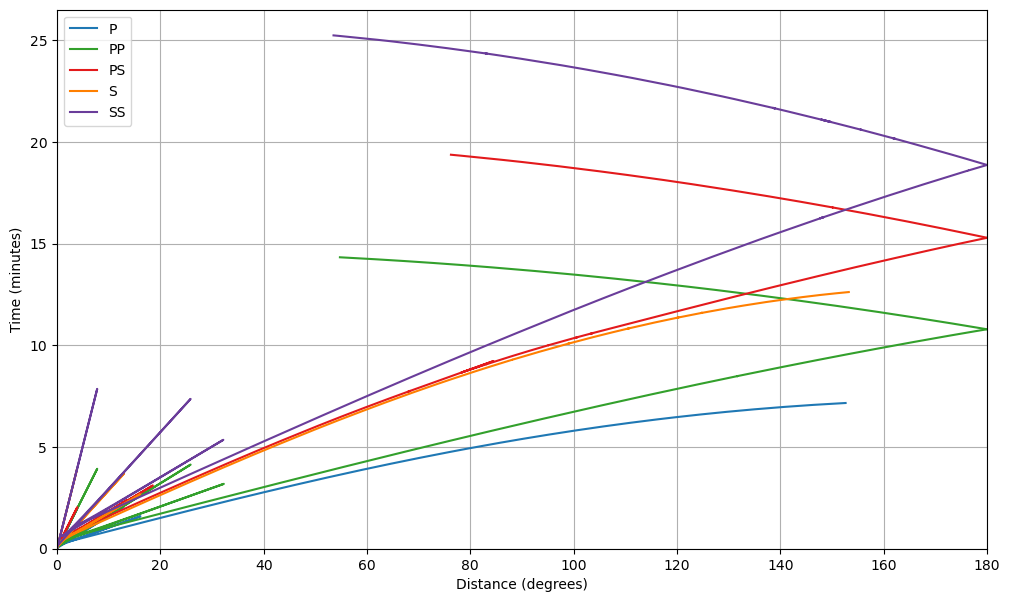

finished


In [5]:
VPREMOON_taup = TauPyModel(model='VPREMOON_atten_taup')
fig, ax = plt.subplots()
ax = plot_travel_times(source_depth=0, ax=ax, fig=fig,
                       phase_list=['P', 'PP', 'S', 'SS', "PS"],  model=VPREMOON_taup, npoints=None)

# takes a while 
print('finished')

<Axes: xlabel='Distance (degrees)', ylabel='Time (minutes)'>

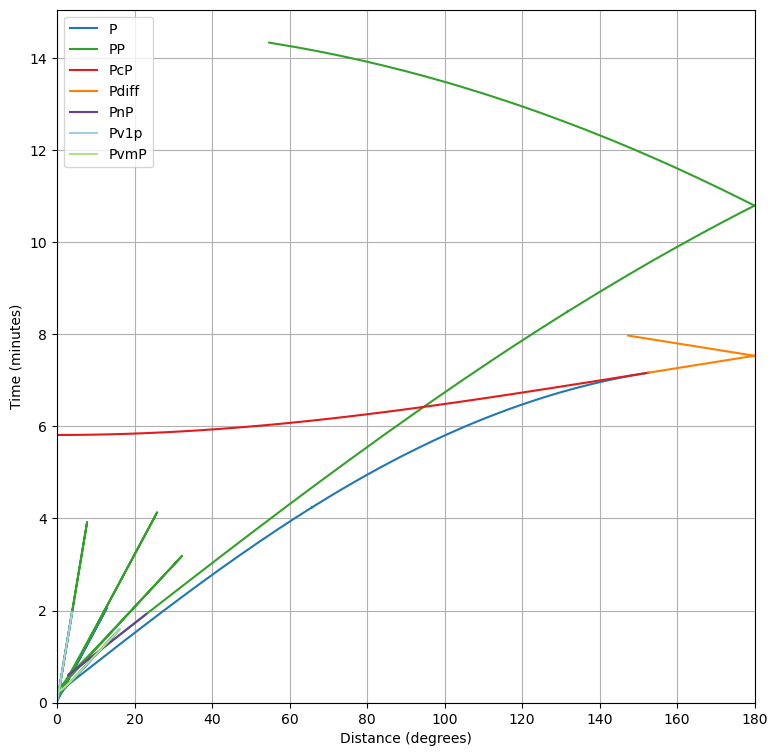

In [6]:
fig, ax = plt.subplots(figsize=(9, 9))

phase_list = ["P", "PP", "PcP", "Pdiff", "PvmP", "PnP", "Pv1p"]

plot_travel_times(model='VPREMOON_atten_taup', source_depth=0.01, phase_list=phase_list,

                       ax=ax, fig=fig, plot_all=True,npoints=None, show=False)

Moon  VPREMOON_taup


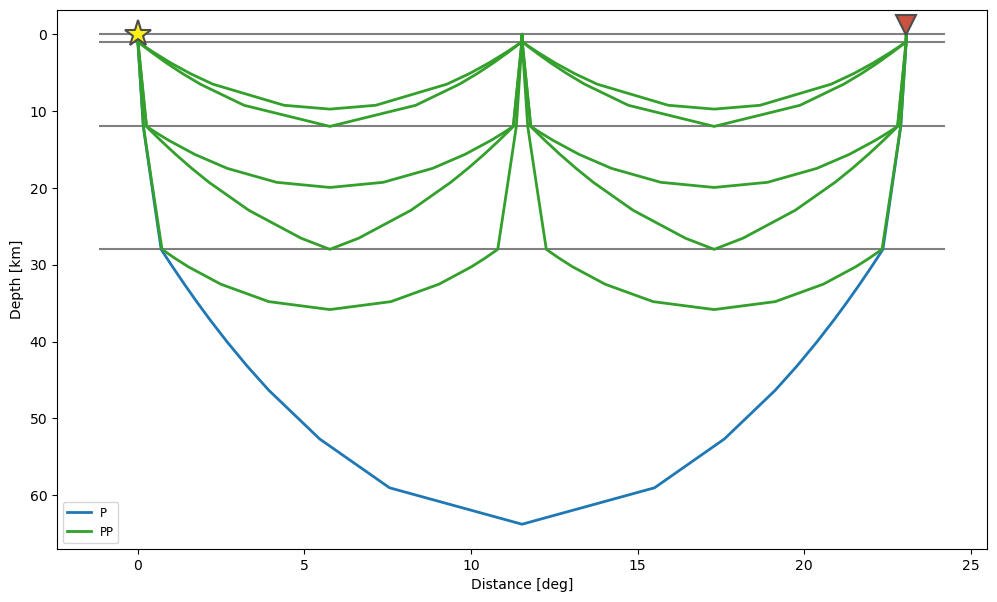

In [7]:
VPREMOON_taup = TauPyModel(model='VPREMOON_atten_taup')
arrivals = VPREMOON_taup.get_ray_paths(source_depth_in_km=0, distance_in_degree=23.06, phase_list=['P', 'PP'])
fig = plt.figure()
arrivals.plot_rays(plot_type='cartesian', phase_list=['P', 'PP'],
                   legend=True, show=False, plot_all=False, fig=fig)
# plt.xlim=(0,50)
# plt.show()

print('Moon ',  'VPREMOON_taup')

# AAAA

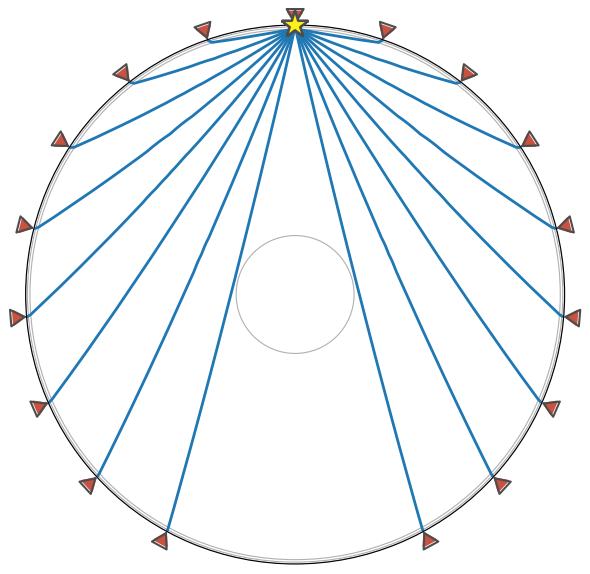

In [8]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax = plot_ray_paths(source_depth=0, ax=ax, fig=fig, phase_list=['S'], model='VPREMOON_atten_taup',
                    npoints=20)

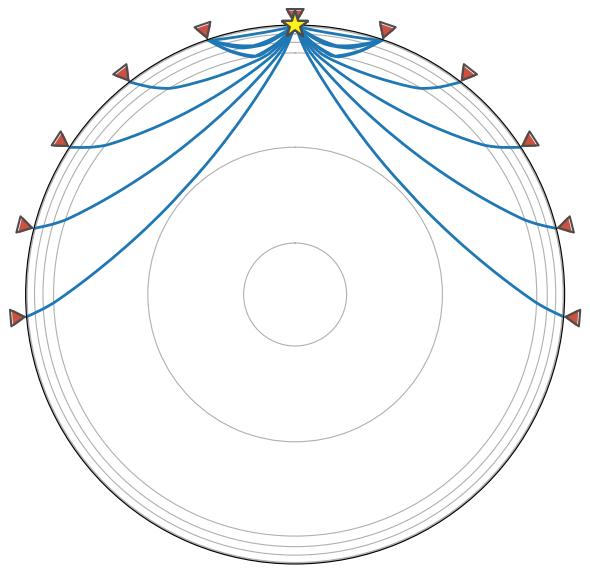

Earth


In [9]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax = plot_ray_paths(source_depth=0, ax=ax, fig=fig, phase_list=['S'],
                    npoints=20)

print('Earth')

Calculated using model :  VPREMOON_taup
Calculated using model :  ISSI_MOON_M1_taup


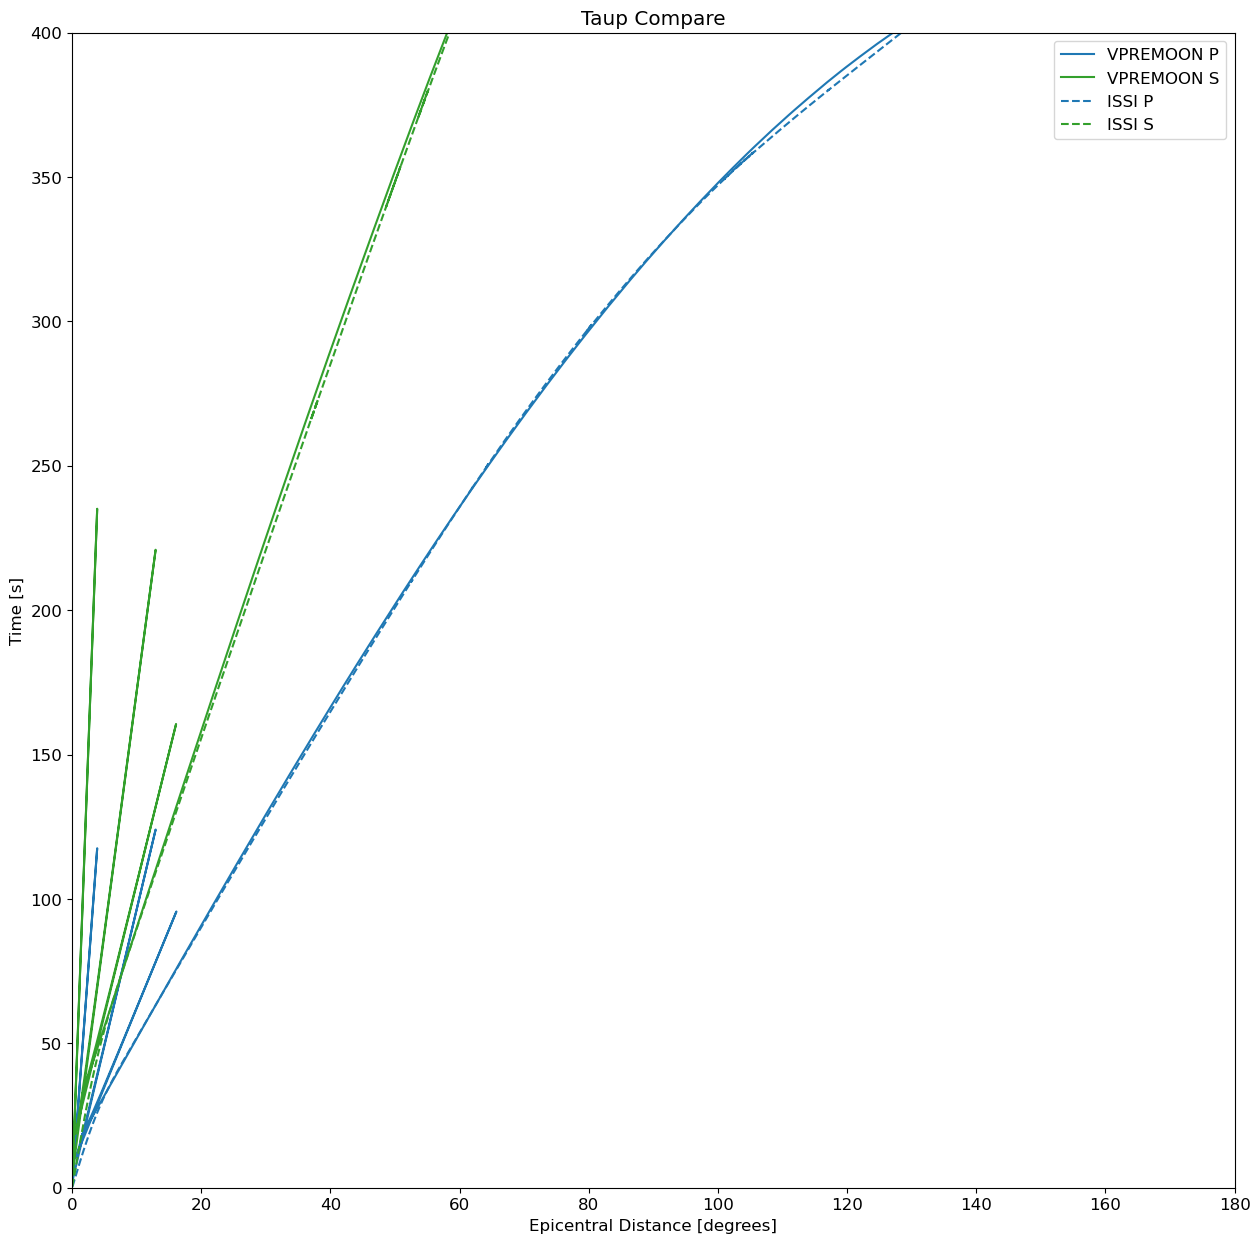

In [10]:
calculated_VPREMOON = TauPyModel(model='VPREMOON_atten_taup')
calculated_ISSI_M1 = TauPyModel(model='ISSI_MOON_M1_atten_taup')

# calculated_homogeneous_Moon = TauPyModel(model='homogeneous_Moon_taup')
# calculated_basic_Moon = TauPyModel(model='basic_Moon_taup')
# calculated_VPREMOON_atten_smooth = TauPyModel(model='VPREMOON_atten_smooth_taup')
# calculated_simple_Moon = TauPyModel(model='simple_Moon_taup')

calculated_taup_dict =	{
  "VPREMOON_taup": calculated_VPREMOON,
  "ISSI_MOON_M1_taup": calculated_ISSI_M1,
#   "homogeneous_Moon_taup": calculated_homogeneous_Moon,
#   "basic_Moon_taup": calculated_basic_Moon,
#   'VPREMOON_atten_smooth_taup':calculated_VPREMOON_atten_smooth,
#   'simple_Moon_taup':calculated_simple_Moon 
}


from postprocessing_util import plot_taup_epicentral

# plot both taup models 
plot_taup_epicentral(calculated_taup_dict=calculated_taup_dict,
                         title='Taup Compare',scale=1000,taup_height=20,
                         startsecond=0, endsecond=400,observations=False, channel='Z', normalize='relative',
                         degree_min =0, degree_max=180,phase_list= ["P", "S"])

## Section 5 - View the depth of direct P at 2.17, and 28.05 and 57.67

### VPREMOON TauP Models

Moon  VPREMOON_taup Maximum depth of P wave


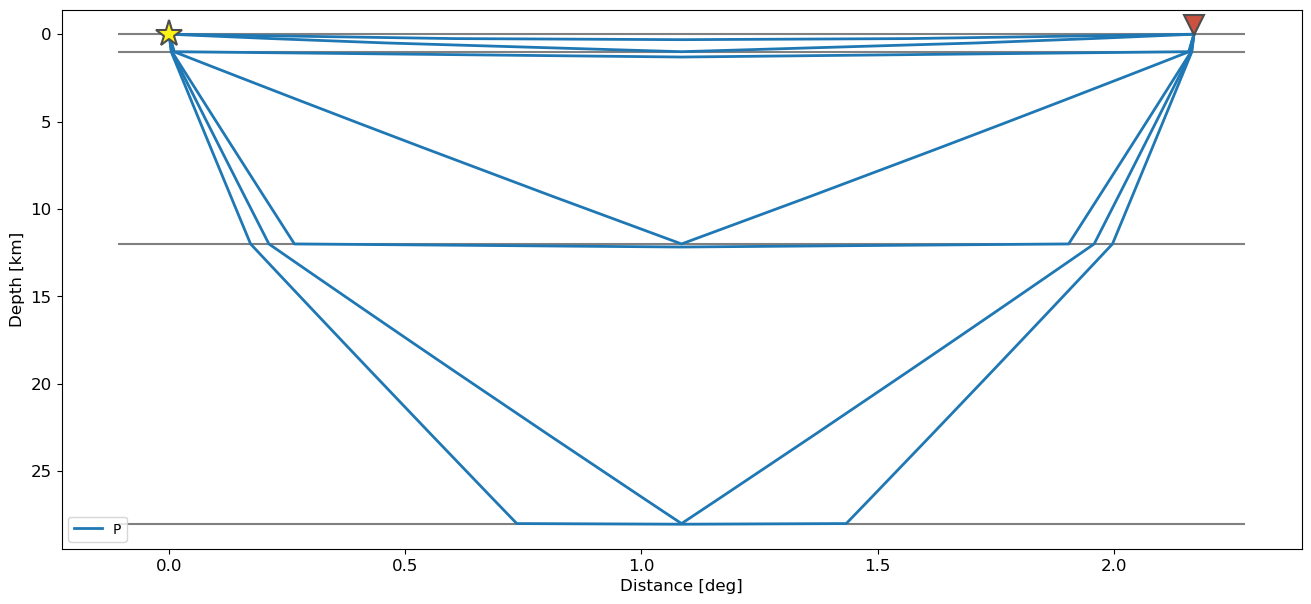

In [11]:
VPREMOON_taup = TauPyModel(model='VPREMOON_atten_taup')
arrivals = VPREMOON_taup.get_ray_paths(source_depth_in_km=0, distance_in_degree=2.17, phase_list=['P'])
fig = plt.figure()
arrivals.plot_rays(plot_type='cartesian',
                   legend=True, show=False, plot_all=False, fig=fig)
print('Moon ',  'VPREMOON_taup', 'Maximum depth of P wave')

Moon  VPREMOON_taup Maximum depth of P wave


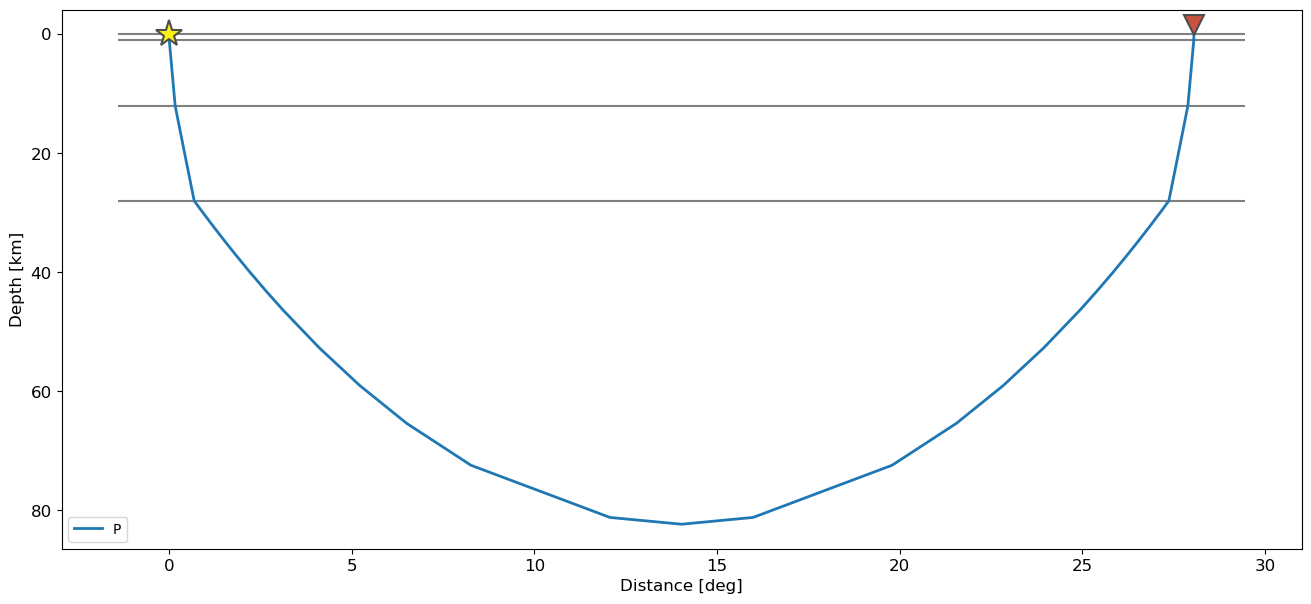

In [12]:
VPREMOON_taup = TauPyModel(model='VPREMOON_atten_taup')
arrivals = VPREMOON_taup.get_ray_paths(source_depth_in_km=0, distance_in_degree=28.05, phase_list=['P'])
fig = plt.figure()
arrivals.plot_rays(plot_type='cartesian',
                   legend=True, show=False, plot_all=False, fig=fig)
print('Moon ',  'VPREMOON_taup', 'Maximum depth of P wave')

Moon  VPREMOON_taup Maximum depth of P wave


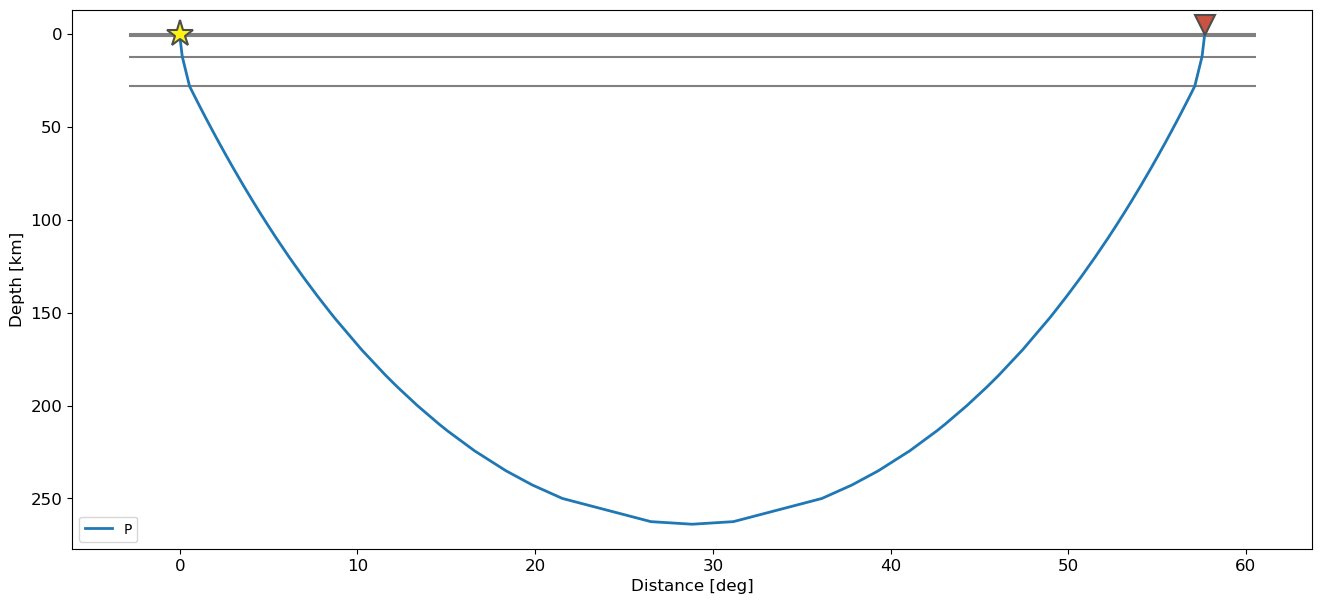

In [13]:
VPREMOON_taup = TauPyModel(model='VPREMOON_atten_taup')
arrivals = VPREMOON_taup.get_ray_paths(source_depth_in_km=0, distance_in_degree=57.67, phase_list=['P'])
fig = plt.figure()
arrivals.plot_rays(plot_type='cartesian',
                   legend=True, show=False, plot_all=False, fig=fig)
print('Moon ',  'VPREMOON_taup', 'Maximum depth of P wave')

### ISSI Taup Models

Moon  ISSI_MOON_M1_atten_taup Maximum depth of P wave


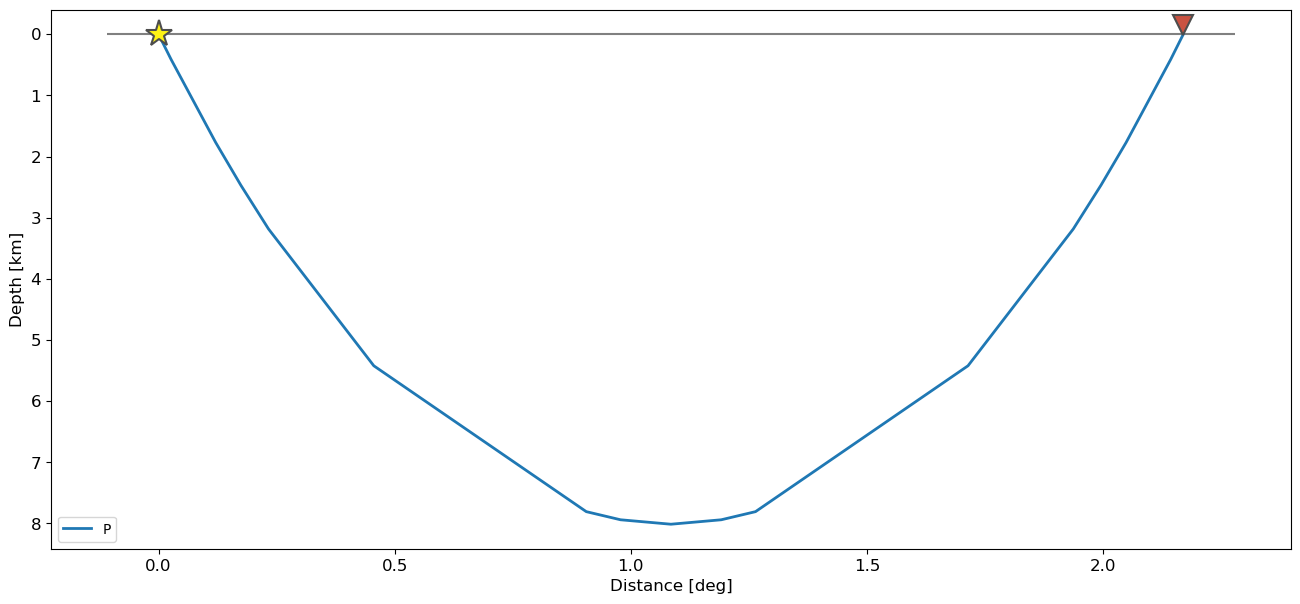

In [14]:
ISSI_taup = TauPyModel(model='ISSI_MOON_M1_atten_taup')
arrivals = ISSI_taup.get_ray_paths(source_depth_in_km=0, distance_in_degree=2.17, phase_list=['P'])
fig = plt.figure()
arrivals.plot_rays(plot_type='cartesian',
                   legend=True, show=False, plot_all=False, fig=fig)
# plt.gca().set_xlim(0, 60)
# plt.gca().set_ylim(255, 0)

print('Moon ',  'ISSI_MOON_M1_atten_taup', 'Maximum depth of P wave')

Moon  ISSI_MOON_M1_atten_taup Maximum depth of P wave


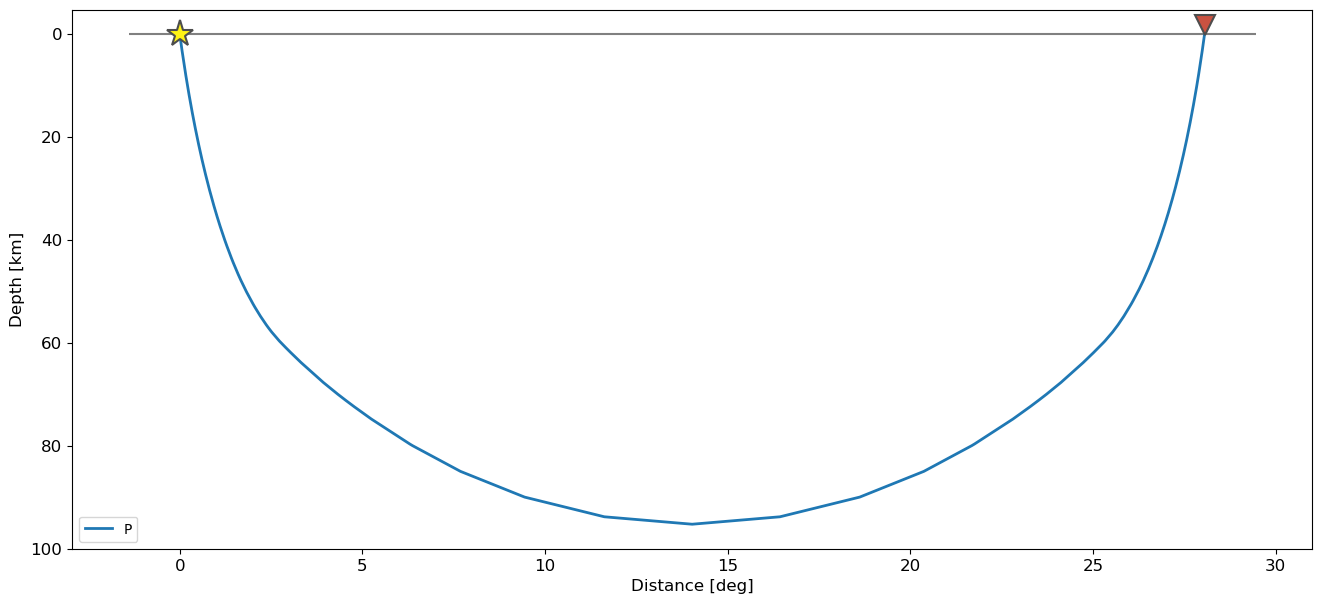

In [15]:
ISSI_taup = TauPyModel(model='ISSI_MOON_M1_atten_taup')
arrivals = ISSI_taup.get_ray_paths(source_depth_in_km=0, distance_in_degree=28.05, phase_list=['P'])
fig = plt.figure()
arrivals.plot_rays(plot_type='cartesian',
                   legend=True, show=False, plot_all=False, fig=fig)
# plt.gca().set_xlim(0, 60)
# plt.gca().set_ylim(255, 0)

print('Moon ',  'ISSI_MOON_M1_atten_taup', 'Maximum depth of P wave')

Moon  ISSI_MOON_M1_atten_taup Maximum depth of P wave


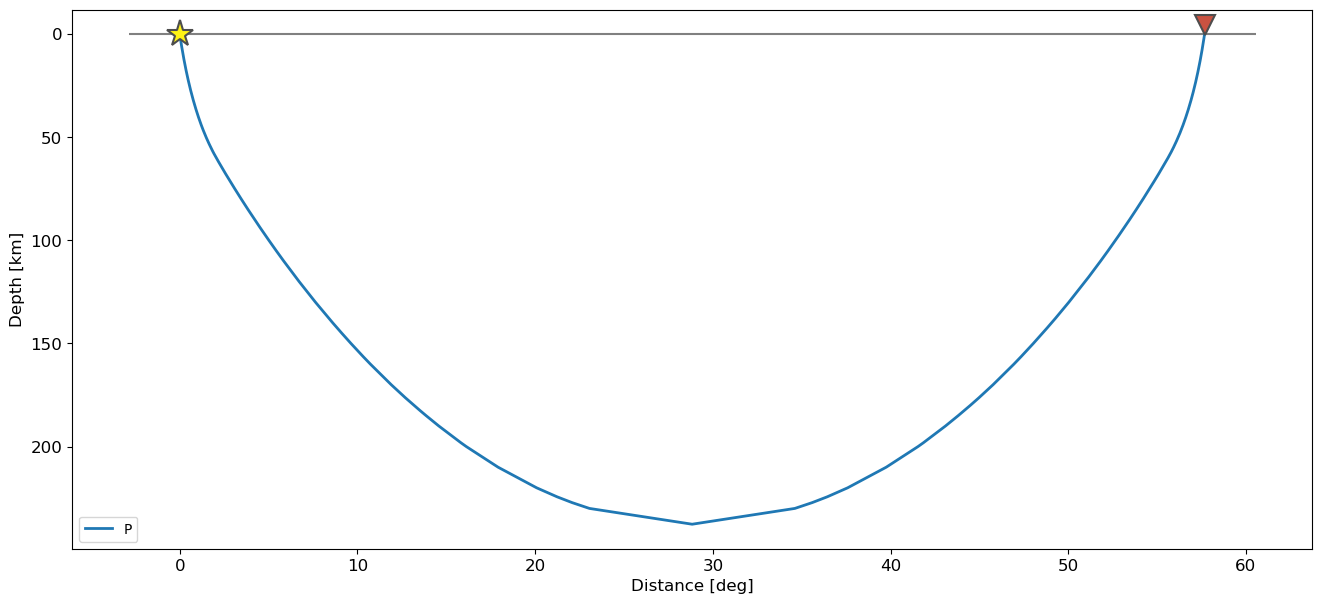

In [16]:
ISSI_taup = TauPyModel(model='ISSI_MOON_M1_atten_taup')
arrivals = ISSI_taup.get_ray_paths(source_depth_in_km=0, distance_in_degree=57.67, phase_list=['P'])
fig = plt.figure()
arrivals.plot_rays(plot_type='cartesian',
                   legend=True, show=False, plot_all=False, fig=fig)
# plt.gca().set_xlim(0, 60)
# plt.gca().set_ylim(255, 0)

print('Moon ',  'ISSI_MOON_M1_atten_taup', 'Maximum depth of P wave')